In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,9)

In [2]:
df = pd.read_csv("/Users/michaelford/uni/st-data-mining/stdm-coursework/data/Crimes_-_2001_to_present.csv")
df = df[df['Primary Type'] == "THEFT"].copy()
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3,4647373,HM244805,2006-03-21 16:45:00,011XX N SPAULDING AVE,0810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,26.0,23.0,06,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
4,4647374,HM245851,2006-03-21 22:00:00,080XX S DOBSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,8.0,44.0,06,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"
32,4647408,HM246001,2006-03-22 00:20:00,015XX N MILWAUKEE AVE,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1.0,24.0,06,1163416.0,1910072.0,2006,04/15/2016 08:55:02 AM,41.908877,-87.675121,"(41.908876749, -87.675120839)"
40,4647416,HM246061,2006-02-03 11:00:00,045XX N SHERIDAN RD,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,46.0,3.0,06,1168795.0,1930288.0,2006,04/15/2016 08:55:02 AM,41.964235,-87.654773,"(41.964235418, -87.654773202)"
41,4647417,HM244872,2006-03-21 16:44:22,082XX S CALUMET AVE,0810,THEFT,OVER $500,STREET,False,False,...,6.0,44.0,06,1179906.0,1850439.0,2006,04/15/2016 08:55:02 AM,41.744876,-87.616373,"(41.74487608, -87.6163731)"


In [4]:
cl = df[['X Coordinate', 'Y Coordinate']]
cl = cl.dropna(axis=0, how='any')
cl = cl[(cl['X Coordinate'] != 0) | (cl['Y Coordinate'] != 0)]

In [6]:
cl.shape

(1343859, 2)

In [16]:
from sklearn.cluster import DBSCAN
# good for clusters of similar density
model = DBSCAN(eps=1000, min_samples= 1000, n_jobs=7)

In [17]:
model.fit(cl)

DBSCAN(algorithm='auto', eps=1000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=7, p=None)

In [18]:
cl['label'] = model.labels_
cs = cl.sample(1000)
cs.label.nunique()

48

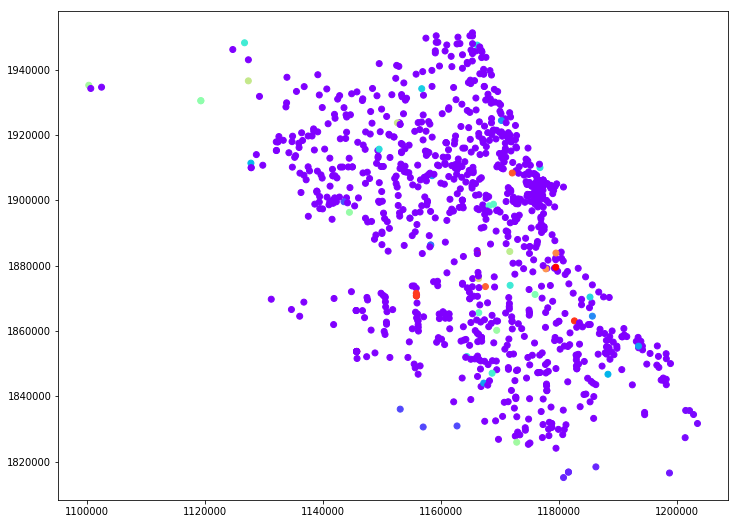

In [19]:
plt.scatter(cs['X Coordinate'],cs['Y Coordinate'], c=cs['label'], cmap='rainbow')

In [25]:
cl.label.value_counts().head()

 0     1257058
 1        4925
 4        4595
-1        2882
 15       2619
Name: label, dtype: int64

In [39]:
cl[cl.label == 4].sample(4)

,X Coordinate,Y Coordinate,label
3817134,1201204.0,1827369.0,4
539690,1202797.0,1839847.0,4
7868,1202452.0,1841205.0,4
5815096,1202707.0,1835279.0,4


In [41]:
df[df.index == 5815096]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
5815096,4237233,HL558776,2005-08-19 14:14:01,037XX E 106TH ST,0810,THEFT,OVER $500,CONSTRUCTION SITE,False,False,...,10.0,52.0,06,1202707.0,1835279.0,2005,04/15/2016 08:55:02 AM,41.702724,-87.533345,"(41.702724248, -87.533344951)"


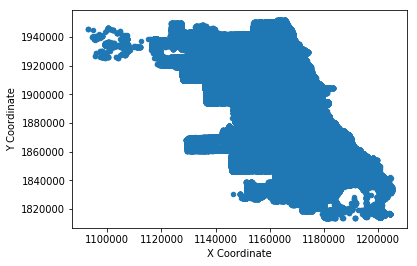

In [50]:
cl.plot.scatter('X Coordinate','Y Coordinate')

In [19]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=50)

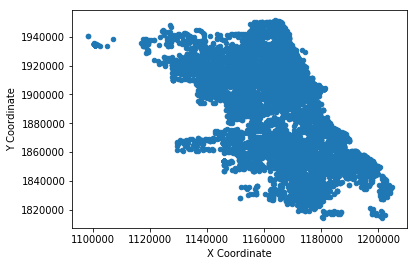

In [10]:
test = cl.sample(n=10000)
test.plot.scatter('X Coordinate','Y Coordinate')

In [20]:
model.fit(test)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=50,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [21]:
model.cluster_centers_

array([[1166836.96465697, 1933341.08731809],
       [1176318.68928571, 1870227.86785714],
       [1152510.82857143, 1891282.7697479 ],
       [1179775.86561265, 1833093.07114625],
       [1174886.00248344, 1900660.76655629],
       [1144898.49671053, 1923510.85197368],
       [1171054.80403458, 1852041.16714697],
       [1147468.84146342, 1854139.9695122 ],
       [1155226.18604651, 1875745.65116279],
       [1194531.38388626, 1853230.53080569],
       [1154753.65375854, 1914331.81321184],
       [1125649.6375    , 1937965.1125    ],
       [1171456.13967611, 1912596.69433198],
       [1200983.35869565, 1827756.30434783],
       [1142391.71193416, 1910146.98971193],
       [1181346.82230624, 1853435.19281664],
       [1162309.82684825, 1945562.57976654],
       [1140485.33823529, 1867050.49509804],
       [1167609.30630631, 1844316.82432432],
       [1175342.81009615, 1892556.40625   ],
       [1100813.48648649, 1934894.17567568],
       [1156655.05      , 1852329.76875   ],
       [11

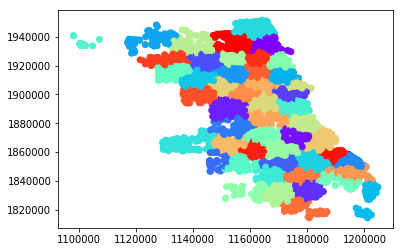

In [22]:
plt.scatter(test['X Coordinate'],test['Y Coordinate'], c=model.labels_, cmap='rainbow')

In [45]:
ex = df.sample(10)

In [4]:
df['TimeOfWeek'] = df['Date'].dt.weekday.astype('timedelta64[D]') + pd.to_timedelta(df['Date'].dt.hour,unit='h')

In [5]:
ex = df[['X Coordinate', 'Y Coordinate', 'TimeOfWeek']]
ex = ex.dropna(axis=0, how='any')
ex['TimeOfWeek'] = ex['TimeOfWeek'].dt.days*24 + ex['TimeOfWeek'].dt.seconds/3600
ex['X Coordinate'] = ex['X Coordinate'] / 1000
ex['Y Coordinate'] = ex['Y Coordinate'] / 1000

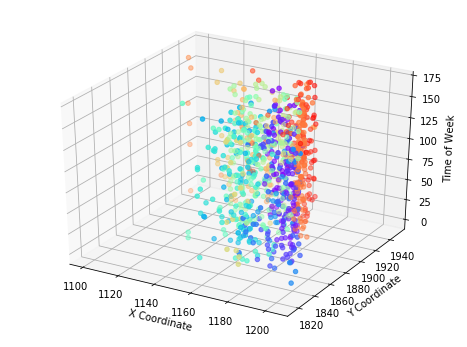

In [209]:
plot_3d = plt.figure().gca(projection='3d')
plot_3d.scatter(ex['X Coordinate'], ex['Y Coordinate'], ex['TimeOfWeek'], c=ex['Ward'], cmap='rainbow' )
plot_3d.set_xlabel('X Coordinate')
plot_3d.set_ylabel('Y Coordinate')
plot_3d.set_zlabel('Time of Week')
plt.show()

In [41]:
#ex.pop('Ward')
print('')

In [211]:
model = MiniBatchKMeans(n_clusters=10)
model.fit(ex)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

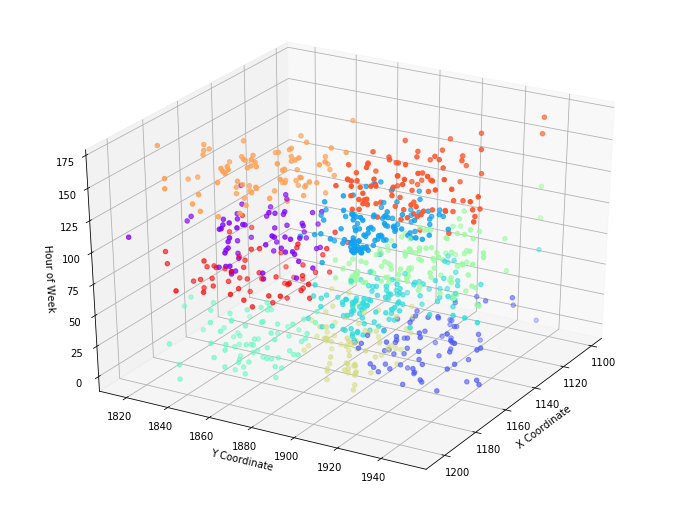

In [223]:
plot_3d = plt.figure().gca(projection='3d')
plot_3d.view_init(30, 30)
plot_3d.scatter(ex['X Coordinate'], ex['Y Coordinate'], ex['TimeOfWeek'], c=model.labels_, cmap='rainbow' )
plot_3d.set_xlabel('X Coordinate')
plot_3d.set_ylabel('Y Coordinate ')
plot_3d.set_zlabel('Hour of Week')
plt.show()

In [220]:
model.cluster_centers_

array([[1181.07631655, 1857.01525899,  103.43884892],
       [1159.08680102, 1920.59197959,   24.17346939],
       [1165.76576094, 1900.68505051,  116.89225589],
       [1161.22191973, 1907.07826421,   58.5819398 ],
       [1180.333     , 1856.50214   ,   24.785     ],
       [1160.40484936, 1917.55777564,   90.35576923],
       [1158.16244693, 1890.26793296,   15.32402235],
       [1170.20839574, 1858.43525532,  147.1106383 ],
       [1159.44878077, 1914.69727692,  148.56923077],
       [1169.20085792, 1852.74647541,   66.50273224]])

In [28]:
from sklearn.cluster import DBSCAN
# good for clusters of similar density
model = DBSCAN(eps=5, min_samples= 100, n_jobs=7)

In [29]:
ex.pop('label')
ex.shape

(1343895, 3)

In [ ]:
model.fit(ex)

In [23]:
ex['label'] = model.labels_

In [24]:
ex.label.nunique()

327

In [25]:
sx = ex.sample(1000)

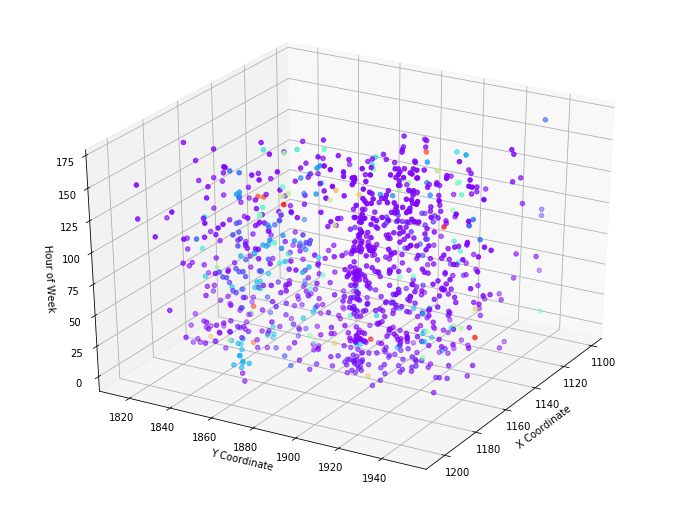

In [26]:
plot_3d = plt.figure().gca(projection='3d')
plot_3d.view_init(30, 30)
plot_3d.scatter(sx['X Coordinate'], sx['Y Coordinate'], sx['TimeOfWeek'], c=sx['label'], cmap='rainbow' )
plot_3d.set_xlabel('X Coordinate')
plot_3d.set_ylabel('Y Coordinate ')
plot_3d.set_zlabel('Hour of Week')
plt.show()

In [27]:
print('hi')

hi
